# Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market
and there are various companies working in the domain. Data science comes as a very important tool to solve problems
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling,
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing
companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file
below.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest
in them or not. For this company wants to know:

• Which variables are important to predict the price of variable?

• How do these variables describe the price of the house?
# Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the
management to understand the pricing dynamics of a new market.
# Technical Requirements:
• Data contains 1460 entries each having 81 variables.

• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.

• Extensive EDA has to be performed to gain relationships of important variable and price.

• Data contains numerical as well as categorical variable. You need to handle them accordingly.

• You have to build Machine Learning models, apply 
regularization and determine the optimal values of Hyper
Parameters.

• You need to find important features which affect the price positively or negatively.

• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [3]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


# EDA:

In [4]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [5]:
df_train.shape

(1168, 81)

In [6]:
df_test.shape

(292, 80)

In [7]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [8]:
df_test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [9]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [12]:
df_train = df_train.drop(["Alley"],axis=1)
df_train = df_train.drop(["PoolQC"],axis=1)
df_train = df_train.drop(["Fence"],axis=1)
df_train = df_train.drop(["MiscFeature"],axis=1)

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [14]:
df_test = df_test.drop(["Alley"],axis=1)
df_test = df_test.drop(["PoolQC"],axis=1)
df_test = df_test.drop(["Fence"],axis=1)
df_test = df_test.drop(["MiscFeature"],axis=1)

In [15]:
df_train.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
Street              2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         110
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        15
MasVnrType          4
MasVnrArea        283
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        551
BsmtFinType2        6
BsmtFinSF2        122
BsmtUnfSF         681
TotalBsmtSF       636
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          669
2ndFlrSF          351
LowQualFinSF       21
GrLivArea 

In [16]:
df_train.drop("Id",axis=1,inplace=True)
df_train.drop("Utilities",axis=1,inplace=True)

In [17]:
df_test.nunique()

Id               292
MSSubClass        15
MSZoning           4
LotFrontage       65
LotArea          249
Street             2
LotShape           4
LandContour        4
Utilities          2
LotConfig          5
LandSlope          3
Neighborhood      24
Condition1         8
Condition2         2
BldgType           5
HouseStyle         8
OverallQual        8
OverallCond        7
YearBuilt         84
YearRemodAdd      57
RoofStyle          5
RoofMatl           3
Exterior1st       12
Exterior2nd       14
MasVnrType         4
MasVnrArea       104
ExterQual          4
ExterCond          4
Foundation         6
BsmtQual           4
BsmtCond           3
BsmtExposure       4
BsmtFinType1       6
BsmtFinSF1       184
BsmtFinType2       6
BsmtFinSF2        32
BsmtUnfSF        231
TotalBsmtSF      224
Heating            4
HeatingQC          4
CentralAir         2
Electrical         4
1stFlrSF         238
2ndFlrSF         113
LowQualFinSF       4
GrLivArea        246
BsmtFullBath       3
BsmtHalfBath 

In [18]:
df_test.drop("Id", axis=1,inplace=True)
df_test.drop("Utilities", axis=1, inplace=True)

In [19]:
#checking value counts
for i in df_train.columns:
        print(df_train[i].value_counts())
        print("________________________")

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64
________________________
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
________________________
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
65.0      35
85.0      26
90.0      20
78.0      19
73.0      16
24.0      16
68.0      16
79.0      14
21.0      14
64.0      14
51.0      13
72.0      13
55.0      13
100.0     12
59.0      12
82.0      12
63.0      11
71.0      11
74.0      11
53.0      10
69.0      10
66.0      10
88.0      10
84.0       9
34.0       9
67.0       9
77.0       8
40.0       8
52.0       8
43.0       8
76.0       8
92.0       8
57.0       7
86.0       7
35.0       7
95.0       7
62.0       7
61.0       7
94.0       6
54.0       6
44.0       6
96.0       6
81.0       6
120.0      6
98.0       6


In [20]:
df_train.drop(columns = ['LowQualFinSF','BsmtFinSF2','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],inplace = True)

In [21]:
#checking value counts
for i in df_test.columns:
        print(df_test[i].value_counts())
        print("________________________")

20     108
60      55
50      31
120     18
30      17
160     16
80      15
90      11
70       7
180      4
190      4
45       2
75       2
85       1
40       1
Name: MSSubClass, dtype: int64
________________________
RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64
________________________
60.0     32
85.0     14
50.0     13
70.0     12
21.0      9
65.0      9
80.0      9
75.0      7
52.0      6
63.0      6
78.0      6
66.0      5
64.0      5
57.0      5
43.0      4
72.0      4
55.0      4
100.0     4
40.0      4
74.0      4
102.0     3
48.0      3
93.0      3
79.0      3
86.0      3
110.0     3
67.0      3
90.0      3
68.0      3
44.0      3
76.0      3
24.0      3
56.0      2
83.0      2
58.0      2
92.0      2
32.0      2
35.0      2
73.0      2
47.0      2
96.0      2
107.0     2
42.0      2
51.0      2
37.0      2
62.0      2
91.0      2
98.0      2
105.0     1
150.0     1
61.0      1
45.0      1
137.0     1
89.0      1
34.0      1
124.0

In [22]:
df_test.drop(columns = ['LowQualFinSF','BsmtFinSF2','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],inplace = True)

In [23]:
df_train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinSF1         0
BsmtFinType2      31
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr 

In [24]:
df_test.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr 

<AxesSubplot:>

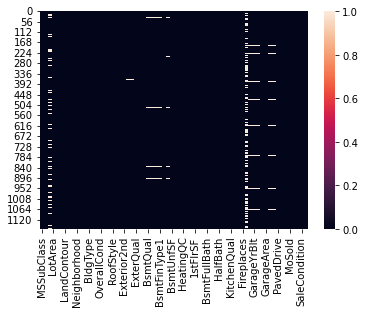

In [25]:
sns.heatmap(df_train.isnull())

In [26]:
df_train['LotFrontage']

0         NaN
1        95.0
2        92.0
3       105.0
4         NaN
5        58.0
6         NaN
7        88.0
8        70.0
9        80.0
10       50.0
11       44.0
12      129.0
13       80.0
14       59.0
15       55.0
16        NaN
17       64.0
18        NaN
19       24.0
20       80.0
21       70.0
22       68.0
23        NaN
24       71.0
25        NaN
26        NaN
27       88.0
28       58.0
29       74.0
30       61.0
31       60.0
32        NaN
33        NaN
34        NaN
35      120.0
36       80.0
37       84.0
38        NaN
39       50.0
40      141.0
41       70.0
42       30.0
43       24.0
44       65.0
45       76.0
46       60.0
47      100.0
48       50.0
49       70.0
50       85.0
51       60.0
52       60.0
53       64.0
54       60.0
55       75.0
56        NaN
57      107.0
58       50.0
59      122.0
60       60.0
61       68.0
62       60.0
63       82.0
64       70.0
65       74.0
66       50.0
67       62.0
68        NaN
69       73.0
70       65.0
71    

In [27]:
# Filling null values of object data column with their mode values (most frequently occurred values).

catcol=df_train.columns.values
for i in range(0,len(catcol)):
    if df_train[catcol[i]].dtype == "object":
        df_train[catcol[i]].fillna(df_train[catcol[i]].mode()[0], inplace=True)

In [28]:
# Filling null values of numerical columns with their mean values

numcol=df_train.columns.values
for i in range(0,len(numcol)):
    if df_train[numcol[i]].dtype != "object":
        df_train[numcol[i]].fillna(df_train[numcol[i]].mean(), inplace=True)

In [29]:
df_train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu 

<AxesSubplot:>

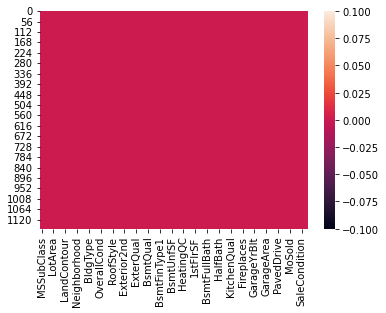

In [30]:
sns.heatmap(df_train.isnull())

In [31]:
# Filling null values of object data column with their mode values (most frequently occurred values).

catcol2=df_test.columns.values
for i in range(0,len(catcol2)):
    if df_test[catcol2[i]].dtype == "object":
        df_test[catcol2[i]].fillna(df_test[catcol2[i]].mode()[0], inplace=True)

In [32]:
# Filling null values of numerical columns with their mean values

numcol2=df_test.columns.values
for i in range(0,len(catcol2)):
    if df_test[numcol2[i]].dtype != "object":
        df_test[numcol2[i]].fillna(df_test[numcol2[i]].mean(), inplace=True)

<AxesSubplot:>

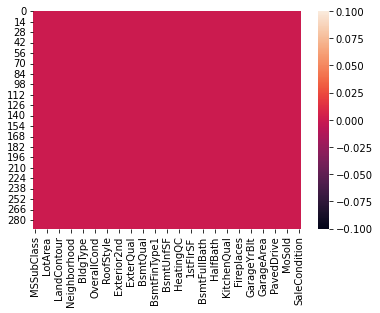

In [33]:
sns.heatmap(df_test.isnull())

In [34]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,70.98847,4928,Pave,IR1,Lvl,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,958,1078,GasA,TA,Y,SBrkr,958,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,2,2007,WD,Normal,128000
1,20,RL,95.00000,15865,Pave,IR1,Lvl,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,1043,2217,GasA,Ex,Y,SBrkr,2217,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,10,2007,WD,Normal,268000
2,60,RL,92.00000,9920,Pave,IR1,Lvl,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,255,1117,GasA,Ex,Y,SBrkr,1127,886,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,6,2007,WD,Normal,269790
3,20,RL,105.00000,11751,Pave,IR1,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,1139,1844,GasA,Ex,Y,SBrkr,1844,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,1,2010,COD,Normal,190000
4,20,RL,70.98847,16635,Pave,IR1,Lvl,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,356,1602,GasA,Gd,Y,SBrkr,1602,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,6,2009,WD,Normal,215000


In [35]:
df_train["Garage_Age"] = df_train.YrSold - df_train.GarageYrBlt
df_train["RemodAdd_Age"] = df_train.YrSold - df_train.YearRemodAdd
df_train["Built_Age"] = df_train.YrSold - df_train.YearBuilt

In [36]:
df_train.drop("GarageYrBlt",axis=1,inplace=True)
df_train.drop("YearRemodAdd",axis=1,inplace=True)
df_train.drop("YearBuilt",axis=1,inplace=True)

In [37]:
df_test["Garage_Age"] = df_test.YrSold - df_test.GarageYrBlt
df_test["RemodAdd_Age"] = df_test.YrSold - df_test.YearRemodAdd
df_test["Built_Age"] = df_test.YrSold - df_test.YearBuilt

In [38]:
df_test.drop("GarageYrBlt",axis=1,inplace=True)
df_test.drop("YearRemodAdd",axis=1,inplace=True)
df_test.drop("YearBuilt",axis=1,inplace=True)

In [39]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,Garage_Age,RemodAdd_Age,Built_Age
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.767979,70.988470,10484.749144,6.104452,5.595890,102.310078,444.726027,569.721747,1061.095034,1169.860445,348.826199,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1.776541,476.860445,96.206336,46.559932,6.344178,2007.804795,181477.005993,29.610954,23.046233,36.874144
std,41.940650,22.437056,8957.442311,1.390153,1.124343,182.047152,462.664785,449.375525,442.272249,391.161983,439.696370,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,0.745554,214.466769,126.158988,66.381023,2.686352,1.329738,79105.586863,24.249798,20.783486,30.193130
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7621.500000,5.000000,5.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,338.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000,7.000000,4.000000,8.000000
50%,50.000000,70.988470,9522.500000,6.000000,5.000000,0.000000,385.500000,474.000000,1005.500000,1096.500000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,24.000000,6.000000,2008.000000,163995.000000,28.806159,14.000000,36.000000
75%,70.000000,79.250000,11515.500000,7.000000,6.000000,160.000000,714.500000,816.000000,1291.500000,1392.000000,729.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,171.000000,70.000000,8.000000,2009.000000,215000.000000,46.250000,42.000000,54.000000
max,190.000000,313.000000,164660.000000,10.000000,9.000000,1600.000000,5644.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,12.000000,2010.000000,755000.000000,107.000000,60.000000,135.000000


In [40]:
df_test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,Garage_Age,RemodAdd_Age,Built_Age
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.00000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,57.414384,66.425101,10645.143836,6.078767,5.493151,109.171821,439.294521,557.315068,1042.767123,1133.691781,339.657534,1477.051370,0.424658,0.065068,1.575342,0.359589,2.794521,1.05137,6.417808,0.595890,1.729452,457.458904,86.397260,47.061644,6.232877,2007.859589,28.099589,22.565068,35.243151
std,43.780649,19.975962,13330.669795,1.356147,1.063267,174.729023,429.559675,411.043768,424.561153,366.941919,424.278825,514.199429,0.508831,0.247070,0.547856,0.494795,0.807336,0.23616,1.728105,0.621259,0.754430,210.785591,121.898836,65.865449,2.774556,1.322867,23.146410,20.089470,30.494309
min,20.000000,21.000000,1526.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,372.000000,0.000000,520.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,0.000000
25%,20.000000,57.750000,7200.000000,5.000000,5.000000,0.000000,0.000000,255.000000,771.750000,858.000000,0.000000,1061.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.00000,5.000000,0.000000,1.000000,300.000000,0.000000,0.000000,4.000000,2007.000000,6.000000,4.000000,6.750000
50%,50.000000,66.425101,9200.000000,6.000000,5.000000,0.000000,369.500000,487.000000,971.000000,1047.500000,0.000000,1440.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.00000,6.000000,1.000000,2.000000,467.500000,0.000000,28.500000,6.000000,2008.000000,28.240000,14.000000,32.000000
75%,70.000000,76.000000,11658.750000,7.000000,6.000000,180.000000,700.500000,780.000000,1322.000000,1370.500000,717.000000,1720.250000,1.000000,0.000000,2.000000,1.000000,3.000000,1.00000,7.000000,1.000000,2.000000,569.750000,149.250000,66.000000,8.000000,2009.000000,42.000000,39.250000,53.250000
max,190.000000,150.000000,215245.000000,10.000000,9.000000,1031.000000,1767.000000,1935.000000,3094.000000,2402.000000,1589.000000,3447.000000,2.000000,1.000000,3.000000,2.000000,6.000000,3.00000,12.000000,2.000000,4.000000,1052.000000,728.000000,418.000000,12.000000,2010.000000,90.000000,60.000000,136.000000


# Data Visualisation:

In [41]:
#Creating a list of categorical and numerical datatypes in train dataset
train_catcol=[]
train_numcol=[]
for i in df_train.columns:
    if (df_train[i].dtype=='object'):
          train_catcol.append(i)
    else:
        train_numcol.append(i)

In [42]:
#Creating a list of categorical and numerical datatypes in test dataset
test_catcol=[]
test_numcol=[]
for i in df_test.columns:
    if (df_test[i].dtype=='object'):
          test_catcol.append(i)
    else:
        test_numcol.append(i)

univariate analysis[Nominal Data]:

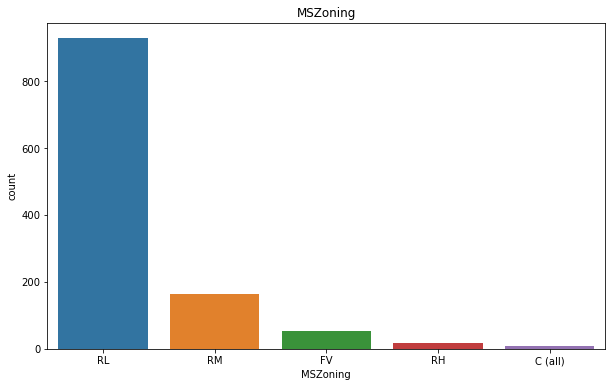

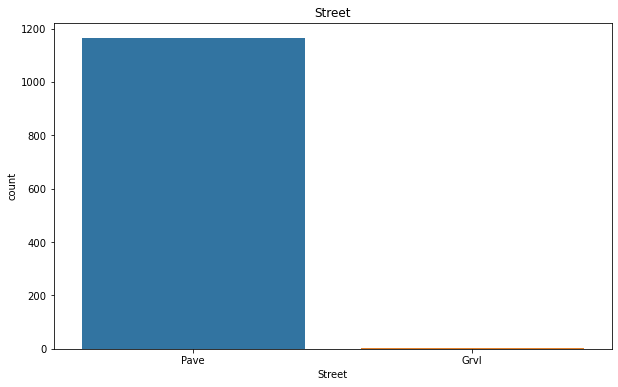

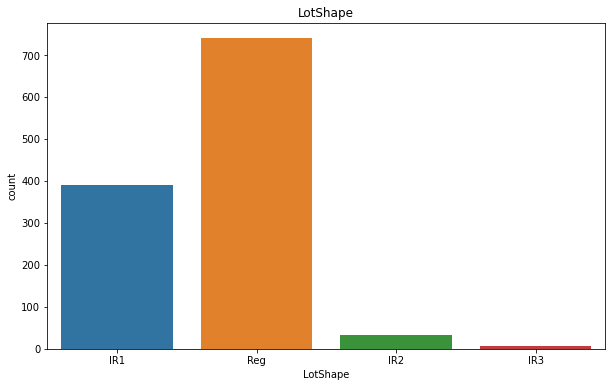

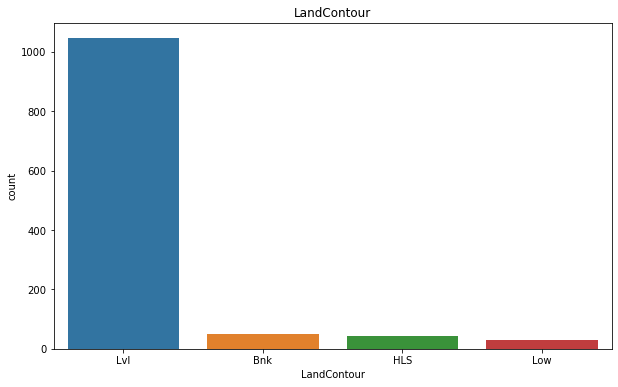

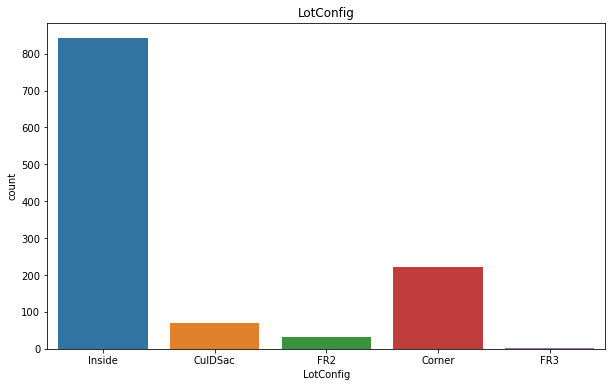

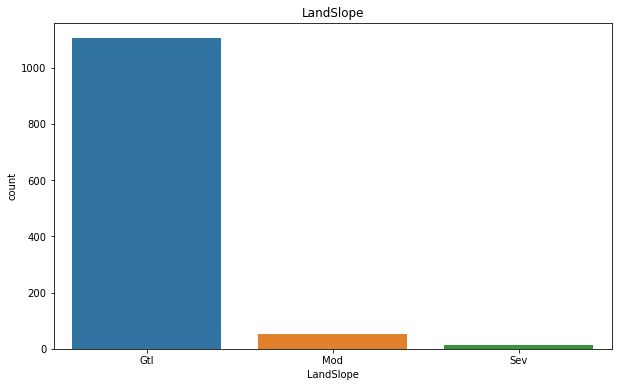

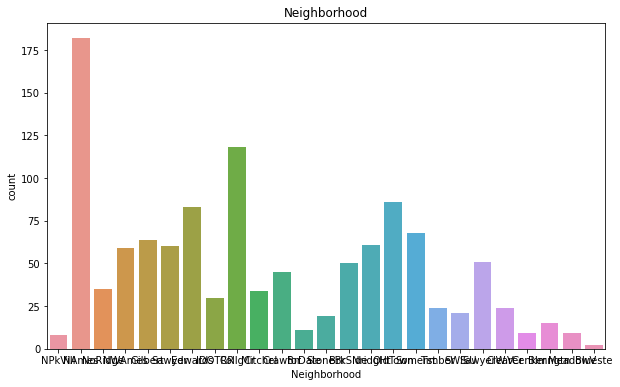

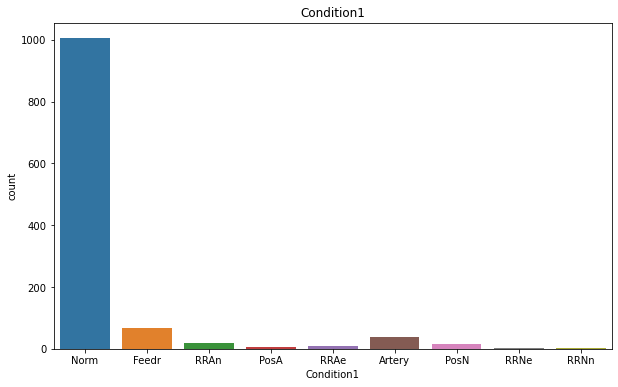

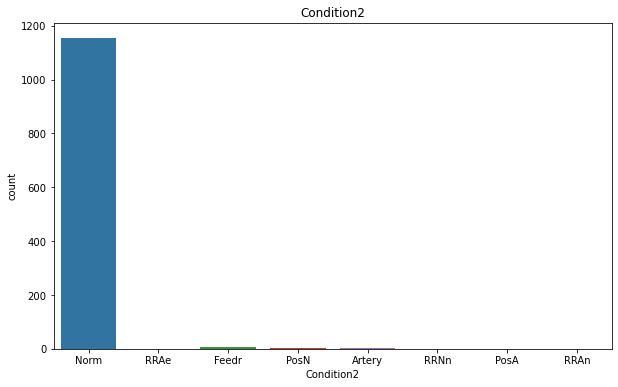

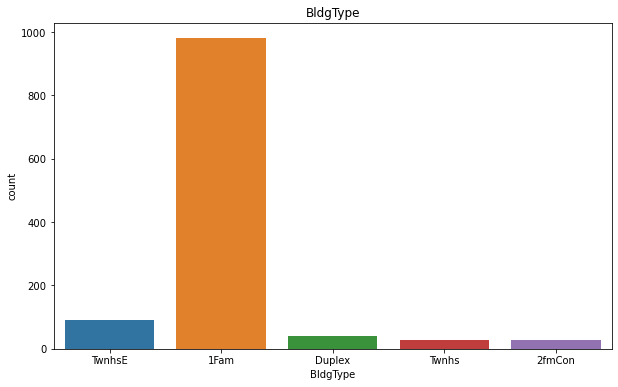

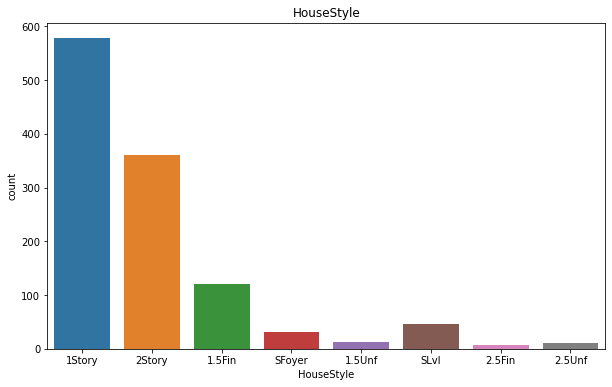

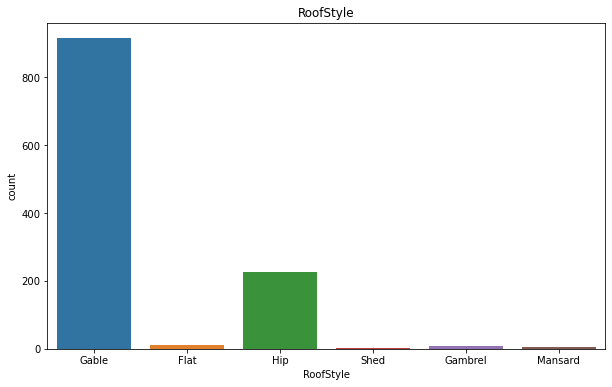

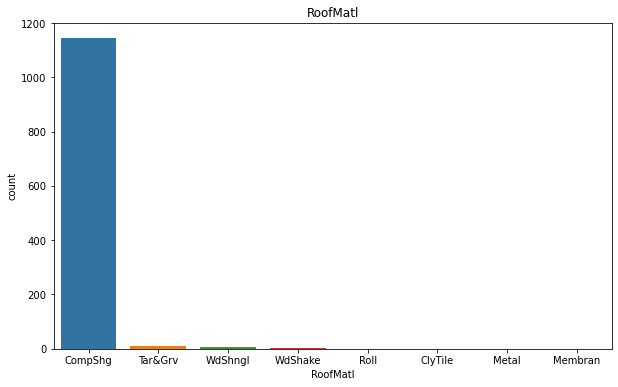

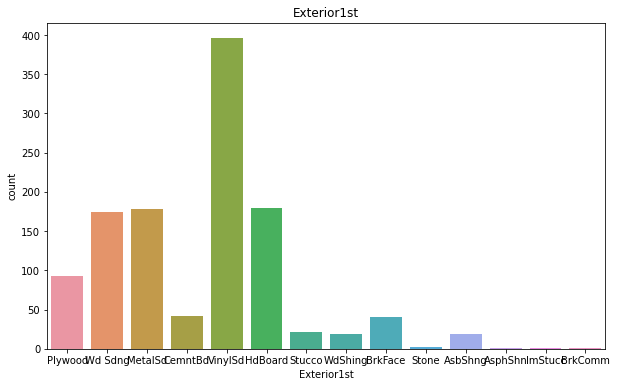

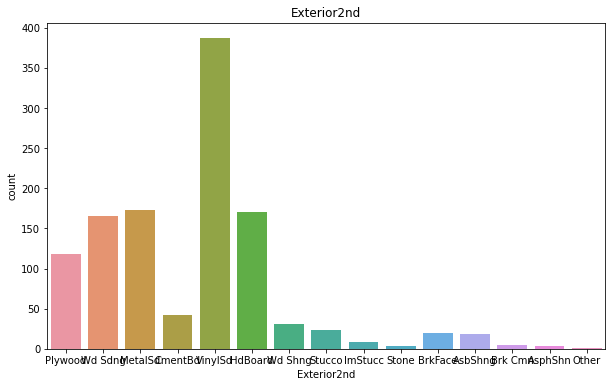

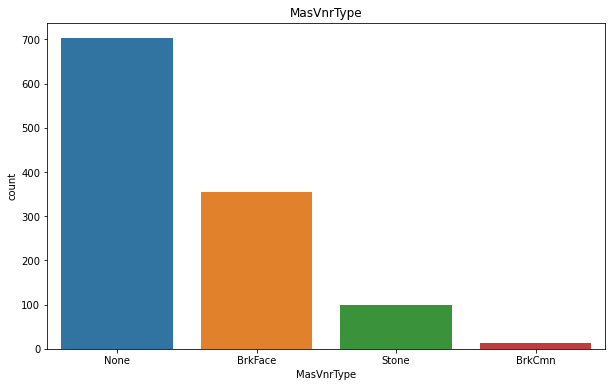

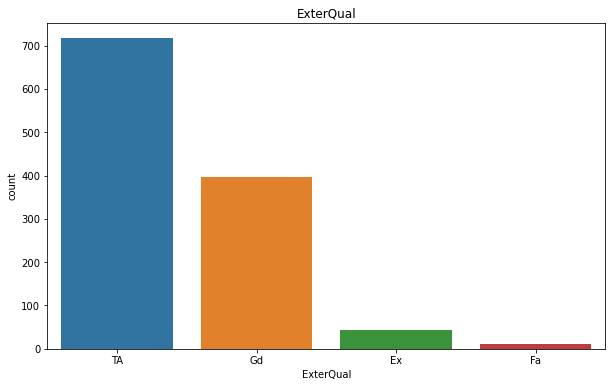

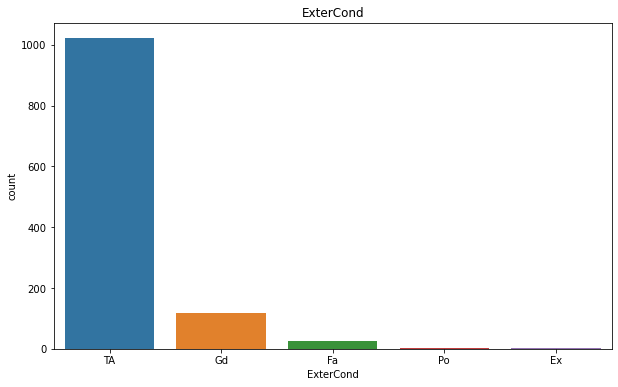

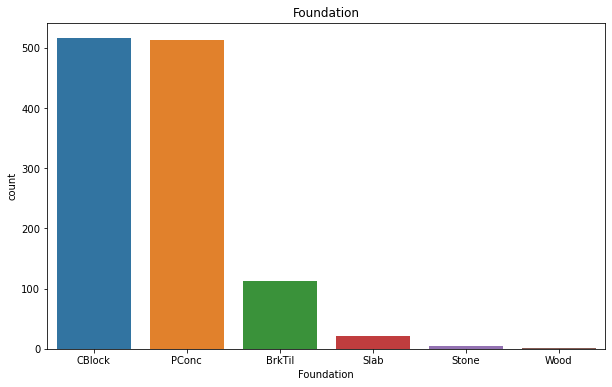

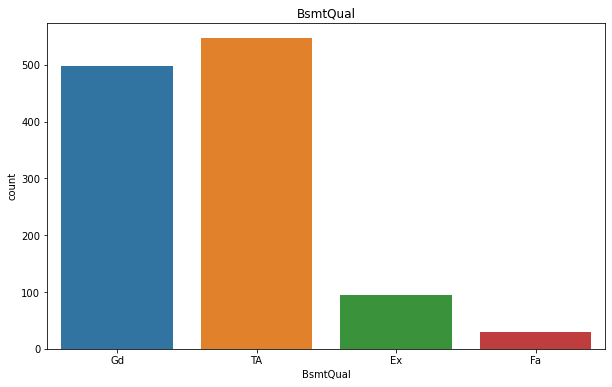

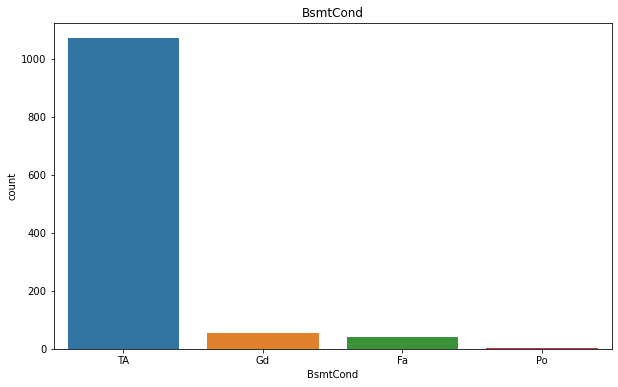

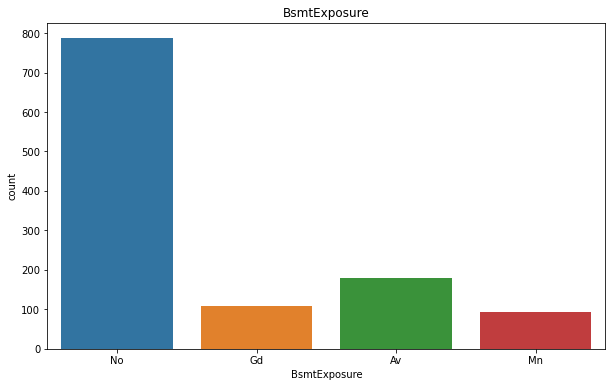

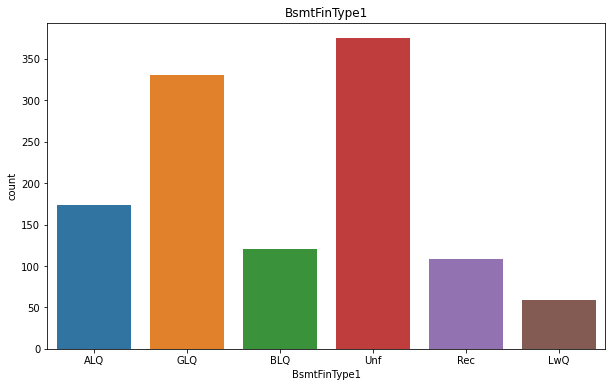

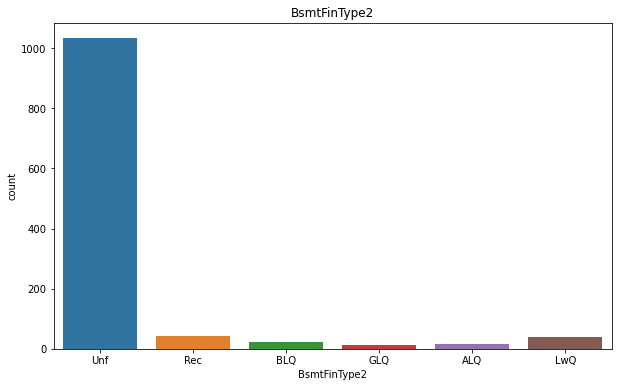

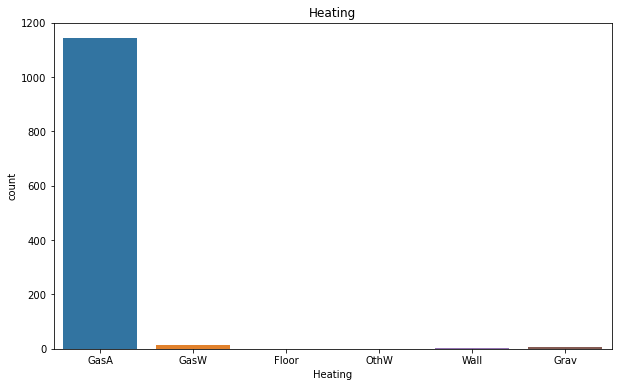

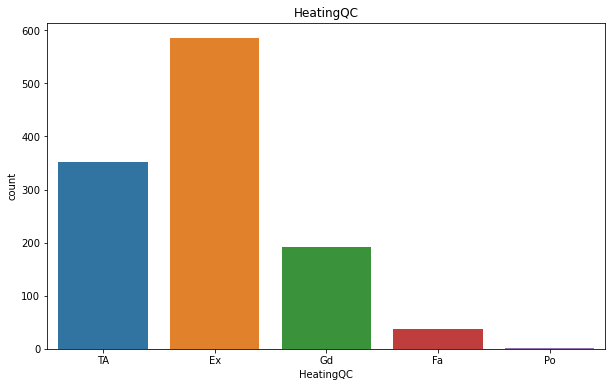

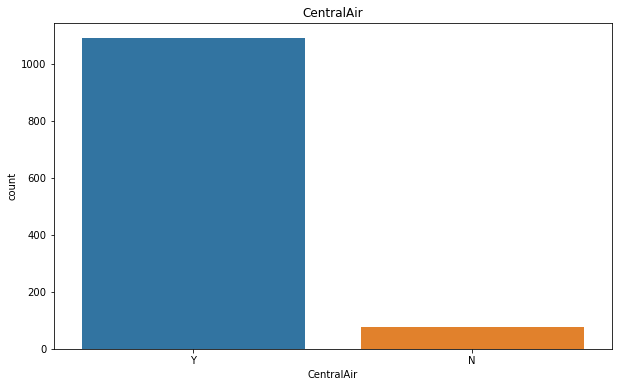

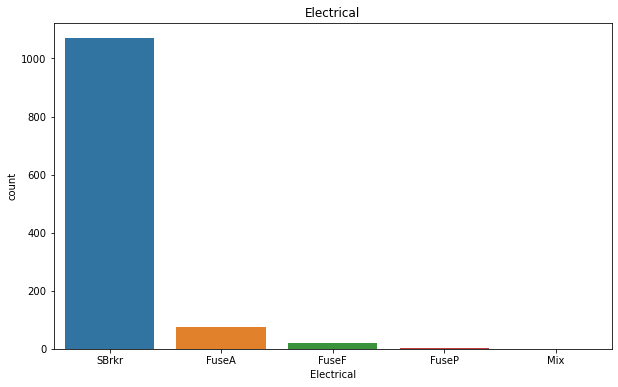

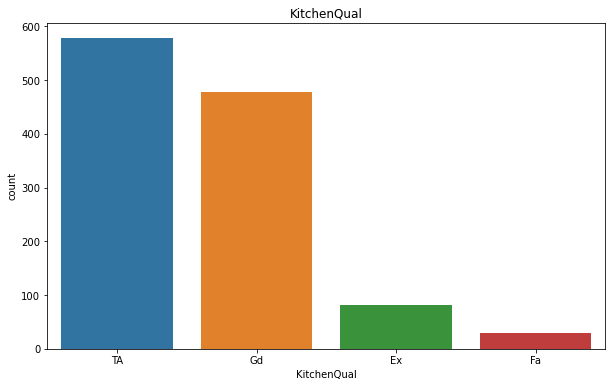

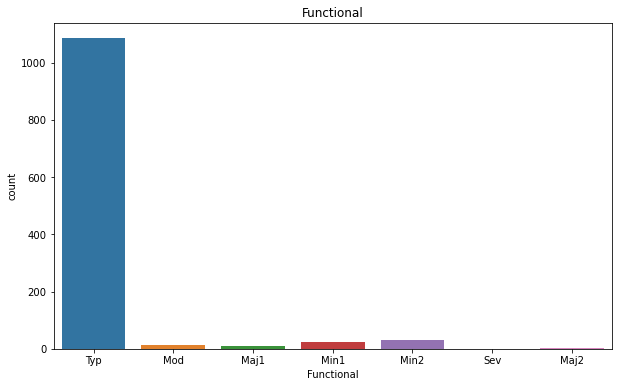

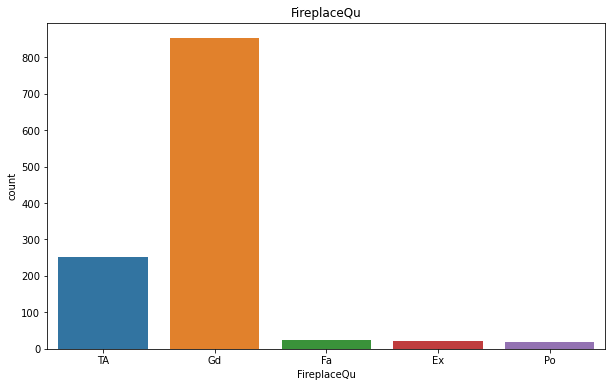

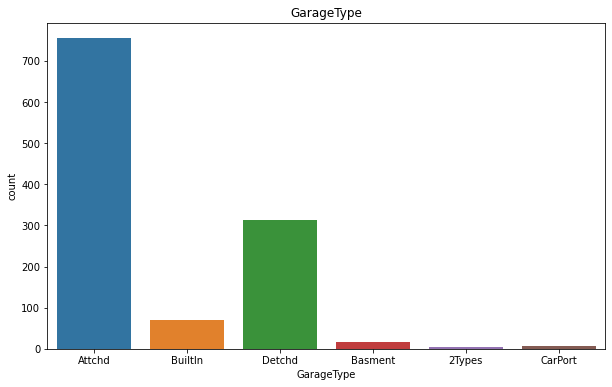

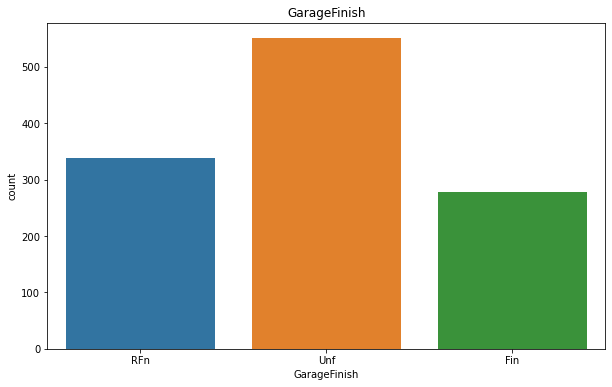

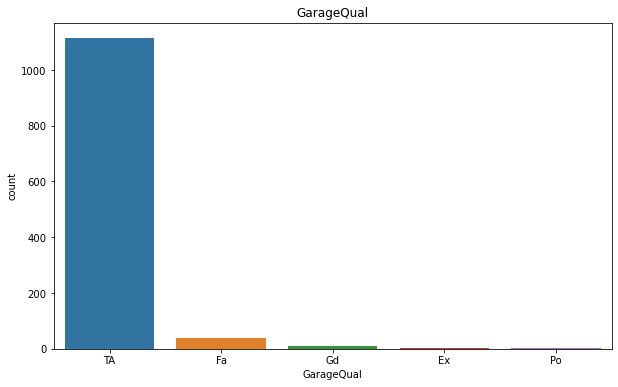

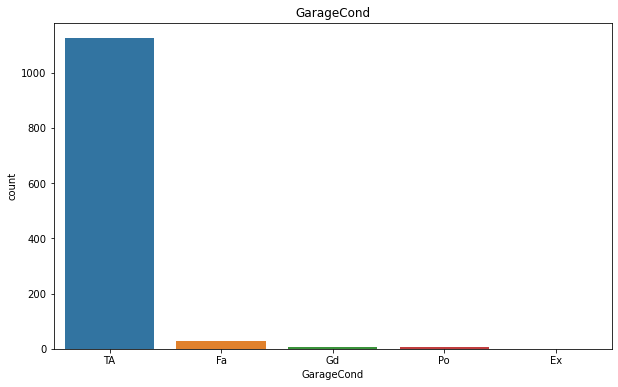

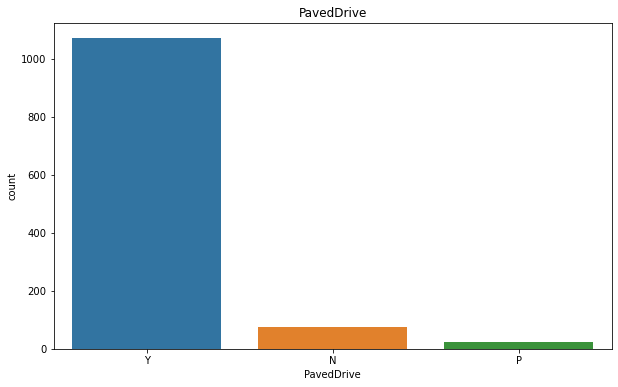

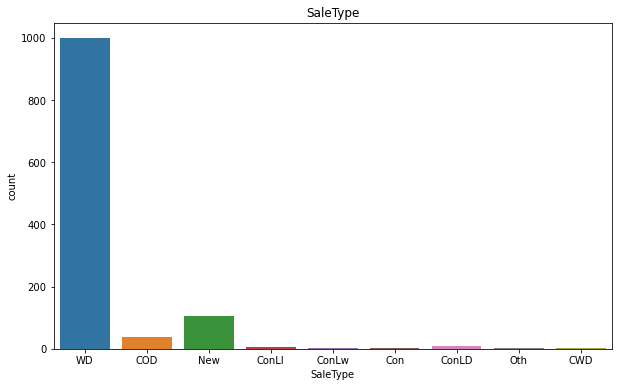

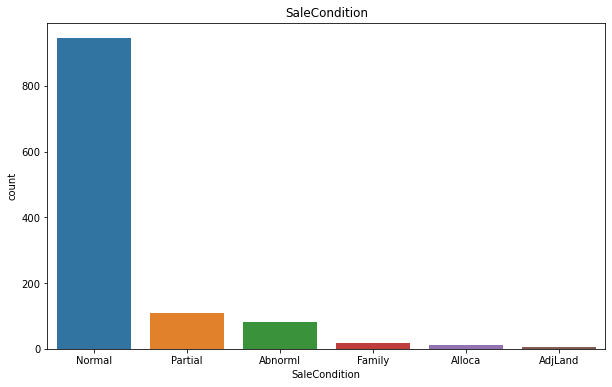

In [43]:
for i in df_train[train_catcol]:              
    plt.figure(figsize = (10,6))
    sns.countplot(df_train[i])
    plt.title(i)
    plt.show()

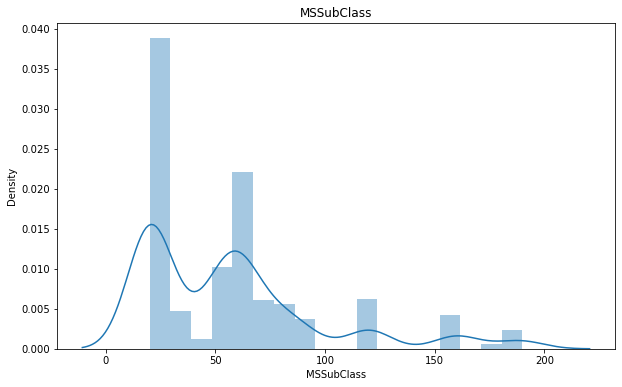

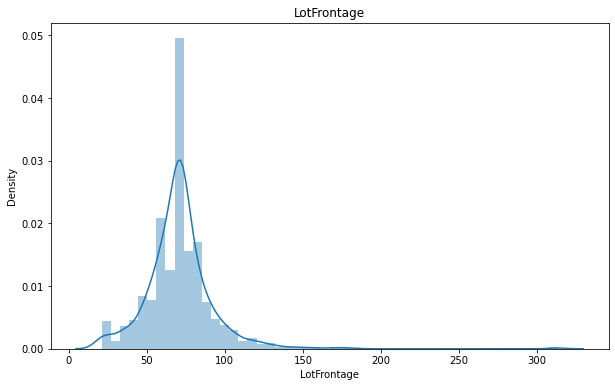

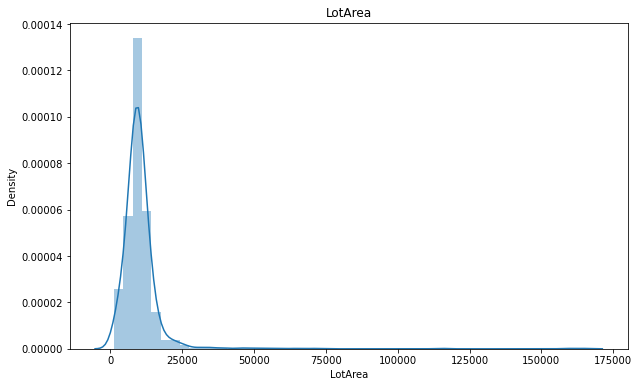

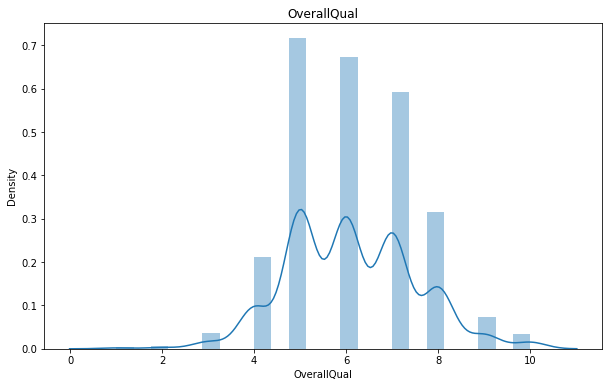

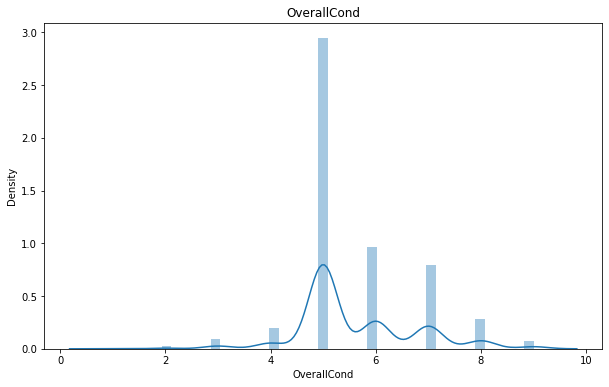

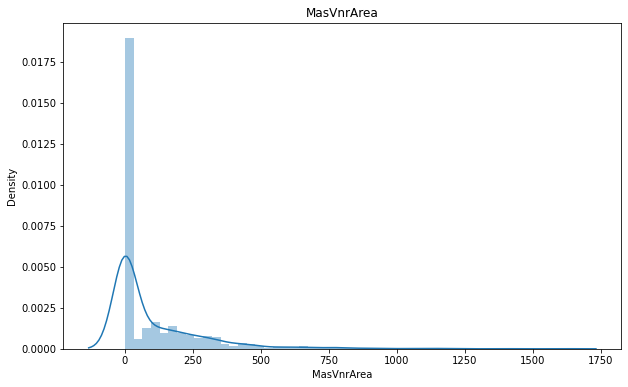

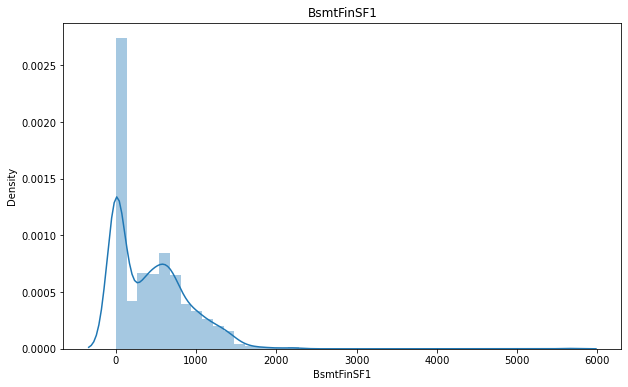

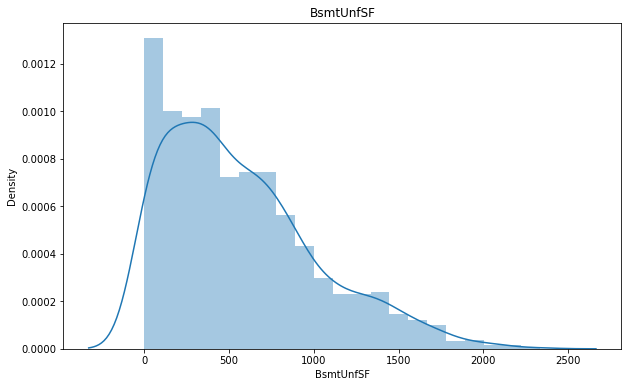

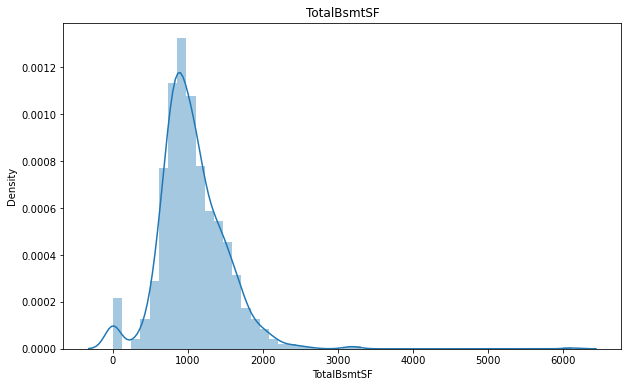

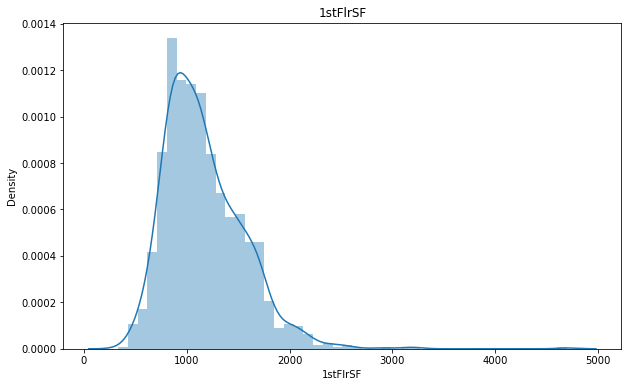

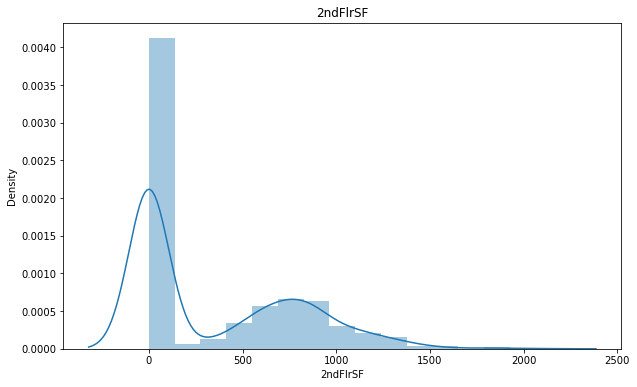

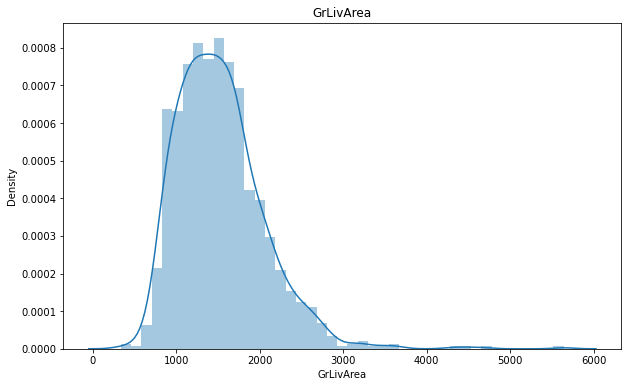

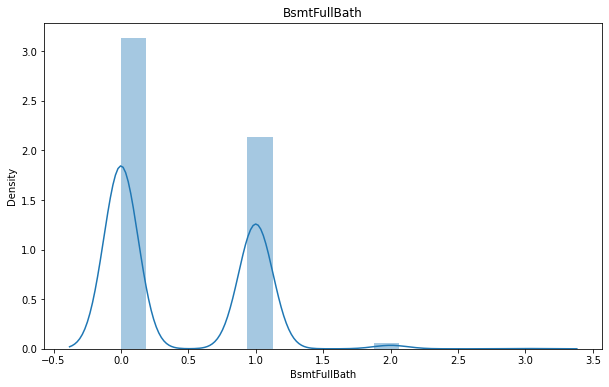

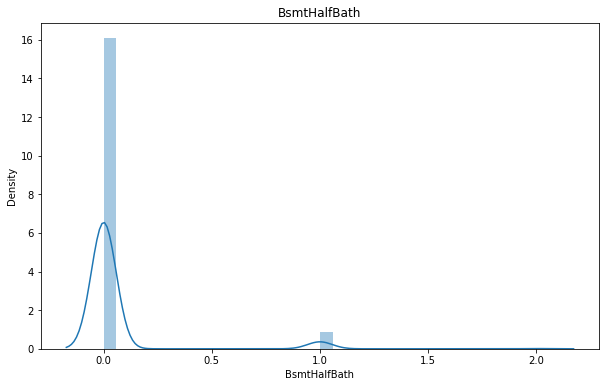

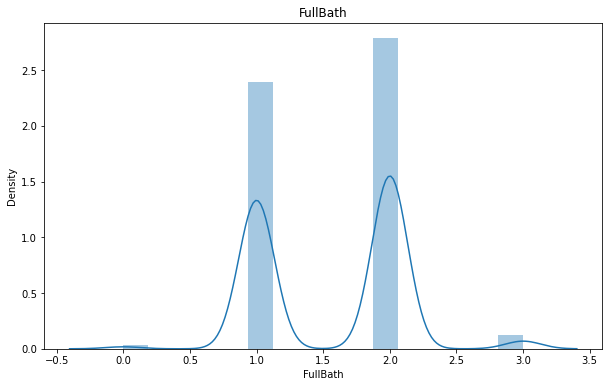

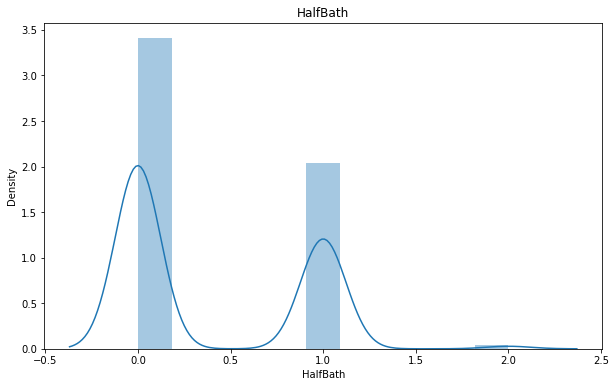

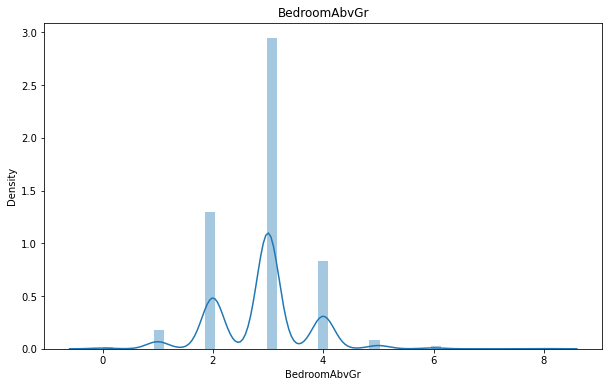

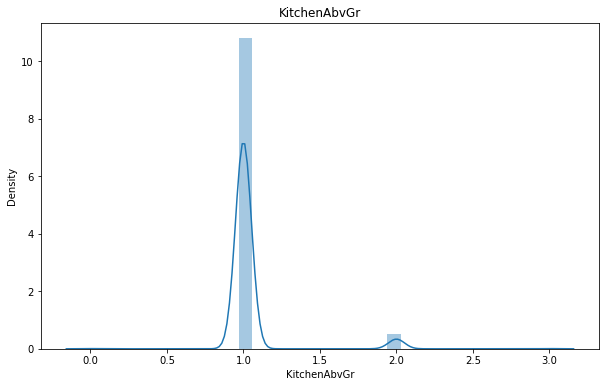

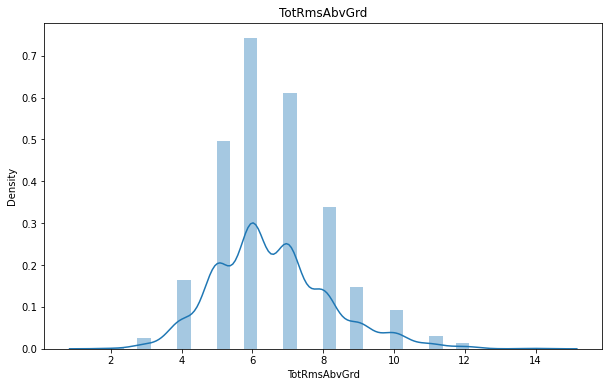

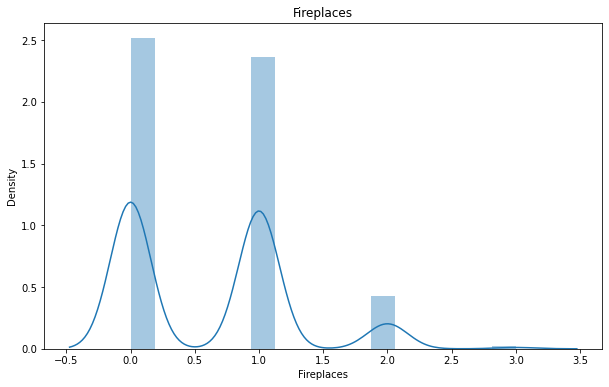

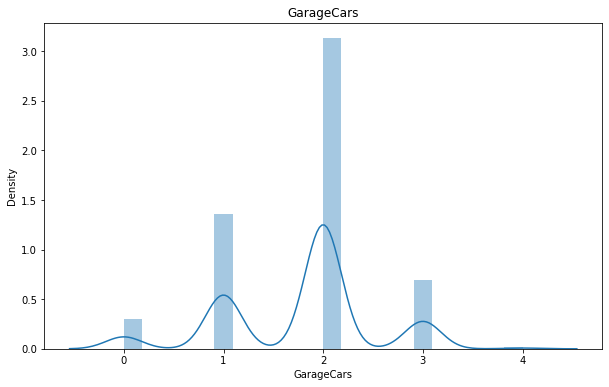

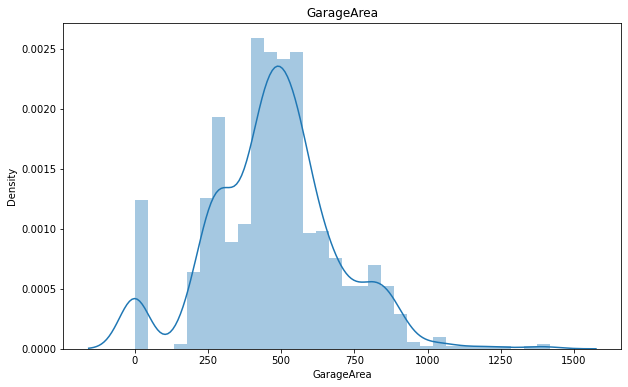

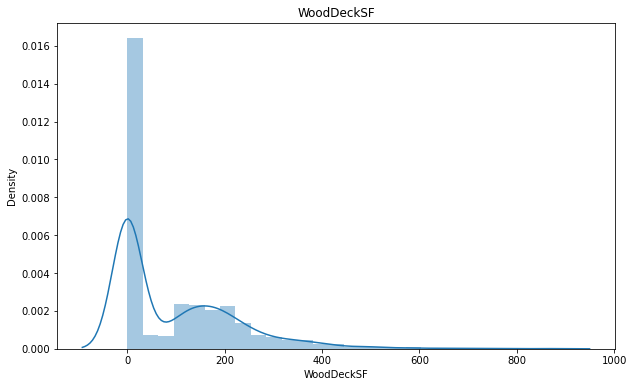

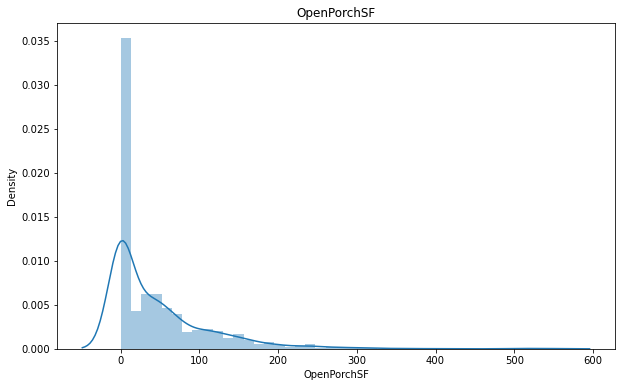

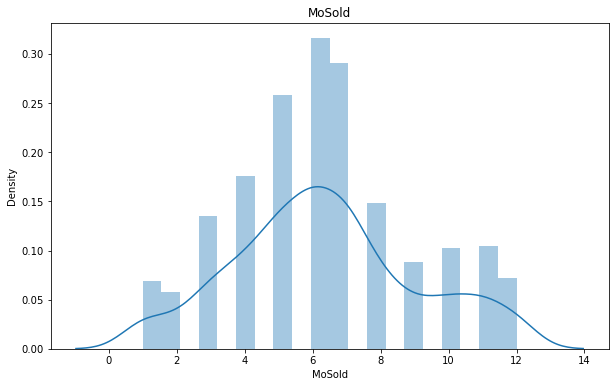

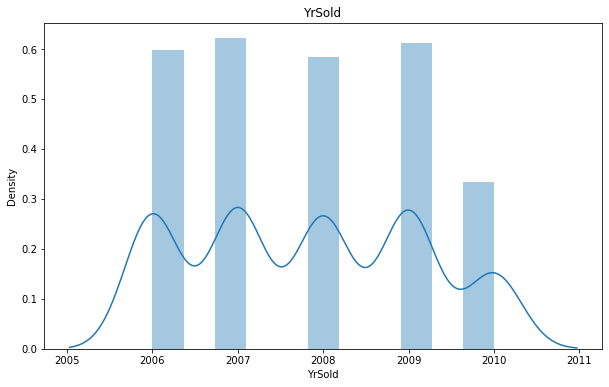

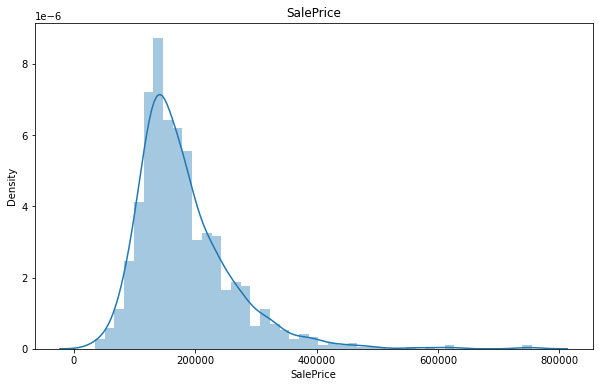

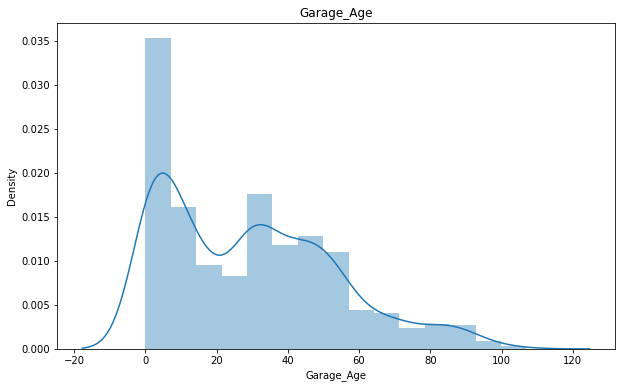

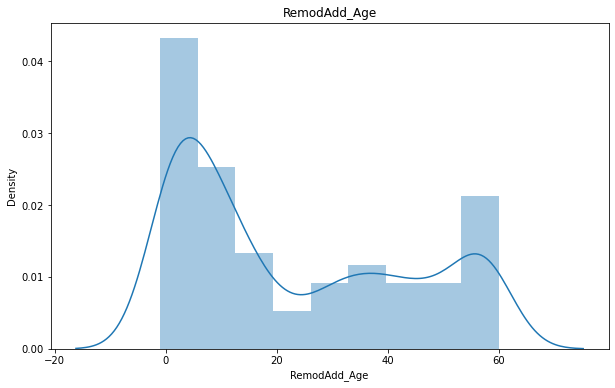

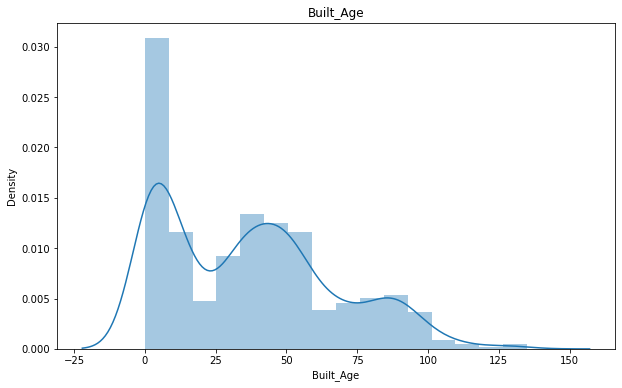

In [45]:
for i in df_train[train_numcol]:              
    plt.figure(figsize = (10,6))
    sns.distplot(df_train[i])
    plt.title(i)
    plt.show()

# Outliers in Train Dataset:

<AxesSubplot:>

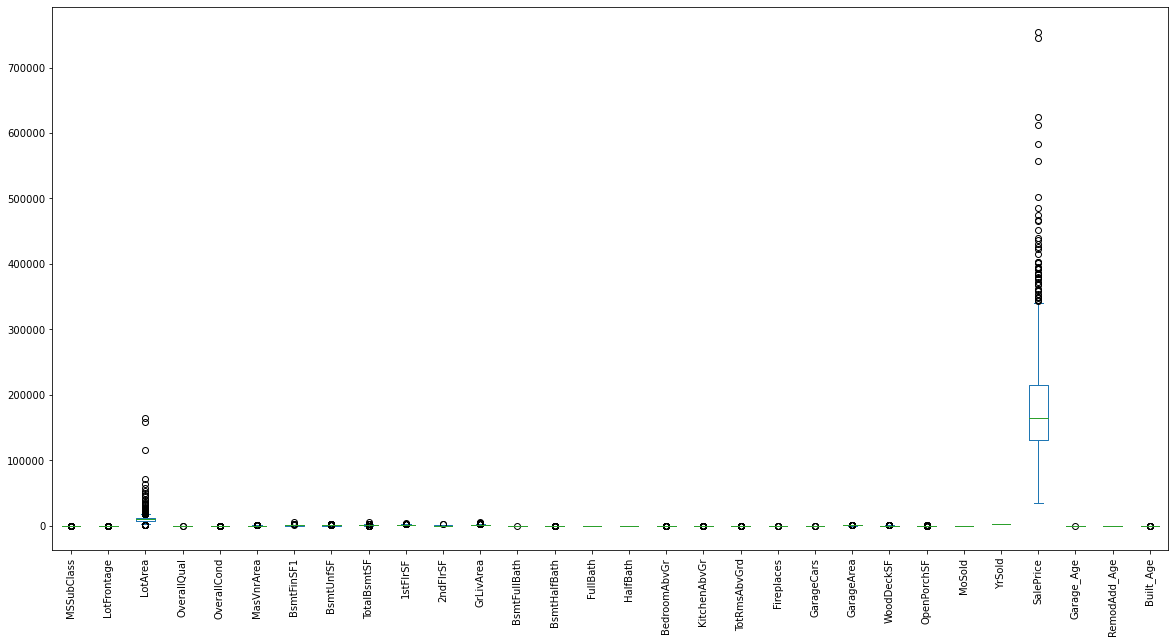

In [52]:
df_train.plot(kind='box',fontsize=10,figsize=(20,10),rot=90)

# Removing the Outliers:

In [57]:
col = df_train[['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Built_Age', 'Garage_Age']]
from scipy.stats import zscore
z=np.abs(zscore(col))

In [59]:
df_newtrain = df_train[(z<3).all(axis=1)] 

In [60]:
df_train.shape

(947, 68)

In [ ]:
df_newtrain